### Import Libary

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
from collections import Counter
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import squarify

### Settings

In [2]:
# allows more rows columns to be displayed
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
# graph setting
matplotlib.rcParams.update({'font.size': 15})

### Read in files

In [3]:
path = '../DataAnalystAssignment/'
path_results = '../WrangledDatasets/'
output_path = '../Result/ResultDatasets/'
graph_path = '../Result/Graph/'

In [4]:
circuits = pd.read_csv(path + 'circuits.csv', encoding = "ISO-8859-1")
constructor_standings = pd.read_csv(path + 'constructor_standings' + '.csv', encoding = "ISO-8859-1")
constructors = pd.read_csv(path + 'constructors' + '.csv', encoding = "ISO-8859-1")
driver_standings = pd.read_csv(path + 'driver_standings' + '.csv', encoding = "ISO-8859-1")
drivers = pd.read_csv(path + 'drivers' + '.csv', encoding = "ISO-8859-1")
lapTimes = pd.read_csv(path + 'lapTimes' + '.csv', encoding = "ISO-8859-1")
pitStops = pd.read_csv(path + 'pitStops' + '.csv', encoding = "ISO-8859-1")
races = pd.read_csv(path + 'races' + '.csv', encoding = "ISO-8859-1")
results = pd.read_csv(path_results + 'results_wrangled' + '.csv', encoding = "ISO-8859-1")
status = pd.read_csv(path + 'status' + '.csv', encoding = "ISO-8859-1")

### Tasks

#### 1. Carry out an analysis and report on the constructors’ success based on championship season wins.

Constructor's win the season championship based on the points they accumulated <br>
the relevant tables to analysis are: results, races <br>
need the year information from races so the points can be calcualted per year <br>

In [5]:
# Constructor's win the season championship based on the points they accumulated
# the relevant tables to analysis are: results, races
# need the year information from races so the points can be calcualted per year
results_races = pd.merge(results, races, on='raceId')

With some research, the constructor's championship 

In [6]:
# sum up the points for each constructor for each year
grouped_results_races = results_races.groupby(['year', 'constructorId'])['points'].apply(sum).reset_index(name='points')
# use the max points of each year
grouped_results_races = grouped_results_races[grouped_results_races.groupby('year')['points'].apply(lambda x: x== x.max())]
grouped_results_races

,year,constructorId,points
1,1950,51.0,92.00
24,1951,6.0,86.00
48,1952,6.0,120.50
73,1953,6.0,122.50
94,1954,6.0,80.28
125,1955,131.0,79.00
132,1956,6.0,83.00
151,1957,105.0,78.00
161,1958,6.0,93.00
202,1959,170.0,97.50


In [7]:
# finally count how many times each constructorId appeared
constructor_win_count = grouped_results_races.groupby('constructorId')['points'].agg(['count']).sort_values( \
                        ['count']).reset_index()
# merge with contructors table to get detailed info about each constructor
constructor_win_count = constructor_win_count.merge(constructors, on='constructorId').sort_values('count')
constructor_win_count.rename(columns={'count':'timesWon'}, inplace=True)
constructor_win_count

,constructorId,timesWon,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,51.0,1,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
3,105.0,1,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati
4,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
5,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
6,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
7,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
8,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
9,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham


According to this, Ferrari has won 24 times...but some quick google indicates that Ferrari only won 16 titles....
<br>
Let's check the results

Check on result for a particualr year, 1951 Alfa won, but data suggests Ferrari actually won. <br>
Same with 2007, McLaren won in points, but McLaren was disqualified for cheating and Ferrari actually got the official title <br>

A bit more research suggests that the constructor championship only stated in 1958, so anything prior was not officially awarded any championship. 
Hence there are 2 version of the result we can produce, one including all years, and one only counting 1958 and above.

In [8]:
constructor_win_count

,constructorId,timesWon,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,51.0,1,alfa,Alfa Romeo,Italian,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
3,105.0,1,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati
4,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
5,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
6,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
7,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
8,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
9,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham


In [9]:
# let's rename grouped_results_races table
constructor_win_alltime = constructor_win_count

In [10]:
# generate another version for only 1958 and upwards
results_races_1958 = pd.merge(results, races, on='raceId')
results_races_1958 = results_races_1958[results_races_1958['year'] >= 1958]
grouped_results_races_1958 = results_races_1958.groupby(['year', 'constructorId'])['points'].apply(sum).reset_index(name='points')
grouped_results_races_1958 = grouped_results_races_1958[grouped_results_races_1958.groupby('year')['points'].apply(lambda x: x== x.max())]

In [11]:
# finally count how many times each constructorId appeared
constructor_win_1958plus = grouped_results_races_1958.groupby('constructorId')['points'].agg(['count']).sort_values( \
                        ['count']).reset_index()
constructor_win_1958plus = constructor_win_1958plus.merge(constructors, on='constructorId').sort_values('count')
constructor_win_1958plus.rename(columns={'count':'timesWon'}, inplace=True)

In [12]:
constructor_win_1958plus

,constructorId,timesWon,constructorRef,name,nationality,url
0,4.0,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
1,32.0,1,team_lotus,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus
2,172.0,1,lotus-climax,Lotus-Climax,British,http://en.wikipedia.org/wiki/Team_Lotus
3,180.0,1,lotus-ford,Lotus-Ford,British,http://en.wikipedia.org/wiki/Team_Lotus
4,196.0,1,matra-ford,Matra-Ford,French,http://en.wikipedia.org/wiki/Matra
5,25.0,2,tyrrell,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing
6,170.0,2,cooper-climax,Cooper-Climax,British,http://en.wikipedia.org/wiki/Cooper_Car_Company
7,191.0,2,brabham-repco,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham
8,66.0,3,brm,BRM,British,http://en.wikipedia.org/wiki/BRM
9,9.0,4,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing


timesWon still do not match with the offical results, needs to check the years that ferrari has won

In [13]:
# check the winning years for Ferrari
grouped_results_races_1958['year'][grouped_results_races_1958['constructorId']==6].values

array([1958, 1961, 1970, 1974, 1975, 1976, 1977, 1979, 1982, 1983, 1998,
       2000, 2001, 2002, 2003, 2004, 2005, 2007, 2009], dtype=int64)

In [14]:
# year 2009, the winner was not Ferrari, and Ferrari only finished 4th place with 70 points 
# (https://www.formula1.com/en/results.html/2009/team.html)
# let's dig deeper
check = pd.merge(results, races, on='raceId')
check = check[check['year'] == 2009]
check = check.merge(circuits, on='circuitId')
check[['resultId','raceId','points','name_x', 'date', 'constructorId']][(check['constructorId']==6) & 
                                                                        (check['points']>0)].sort_values('points')

,resultId,raceId,points,name_x,date,constructorId
7,8.0,1.0,1.0,Australian Grand Prix,2009-03-29,6.0
314,315.0,17.0,2.0,Abu Dhabi Grand Prix,2009-11-01,6.0
273,274.0,15.0,3.0,Japanese Grand Prix,2009-10-04,6.0
193,194.0,11.0,3.0,European Grand Prix,2009-08-23,6.0
132,133.0,7.0,4.0,Turkish Grand Prix,2009-06-07,6.0
171,172.0,9.0,5.0,German Grand Prix,2009-07-12,6.0
90,91.0,5.0,6.0,Spanish Grand Prix,2009-05-10,6.0
110,111.0,6.0,6.0,Monaco Grand Prix,2009-05-24,6.0
310,311.0,17.0,6.0,Abu Dhabi Grand Prix,2009-11-01,6.0
190,191.0,10.0,6.0,Hungarian Grand Prix,2009-07-26,6.0


check the last row, raced at British Grand Prix	on 2009-06-21, this says Ferrari won. <br>
But according to quick google search, Ferrari finished at 5th place, recieved 5 points, the 2nd driver finished at 8th place and recieved 1 point.(https://web.archive.org/web/20141124221806/http://www.formula1.com/results/season/2009/813/) <br>
The actual winner of that race was a driver from Red Bull

In [15]:
# sanity check on the result table, produce the same wrong data
results[results['resultId'] == 149.0]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
148,149.0,8.0,17.0,6.0,2.0,2.0,1.0,1,1.0,10.0,70.0,31:50.2,5510245.0,20.0,2.0,1:20.915,206.956,1.0


#### Assumption:
It is not possible to go through each row and check whether the data are accurate. Hence for this task, will have to stick with what is provided by the files.

Let's also include the total no.of seasons each constructor has appeared, to get a success rate 

In [16]:
# use the already merged results and race table from before
# count season appearances ## use of ['resultId', 'raceId'] after 1st groupby is due to limitation of running this on Binder
season_appearance = results_races.groupby(['constructorId','year'])['resultId', 'raceId'].min().groupby('constructorId')['resultId'].count(
    ).reset_index(name='appearances')
# sanity check
season_appearance[season_appearance['constructorId'] == 6]

C:\Users\Dango\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,constructorId,appearances
5,6.0,62


In [17]:
# Ferrari has appeared every season since 1950, so 62 would mean only up to 2012, let's do a sanity check
len(results_races['year'].unique().tolist())

62

Sanity check on the unique count on year matched, seems like certain year's results are missing.

In [18]:
# merge season_appearance with the constructor_win_1958plus and constructor_win_alltime respectively 
constructor_win_1958plus = constructor_win_1958plus.merge(season_appearance, on='constructorId')
constructor_win_alltime = constructor_win_alltime.merge(season_appearance, on='constructorId')

In [19]:
# calculate the win percentage
constructor_win_alltime['winRate'] = constructor_win_alltime['timesWon']/constructor_win_alltime['appearances']
constructor_win_1958plus['winRate'] = constructor_win_1958plus['timesWon']/constructor_win_1958plus['appearances']

In [20]:
# write to file
constructor_win_alltime.to_csv(output_path + 'constructor_win_alltime.csv', index=False)
constructor_win_1958plus.to_csv(output_path + 'constructor_win_1958plus.csv', index=False)

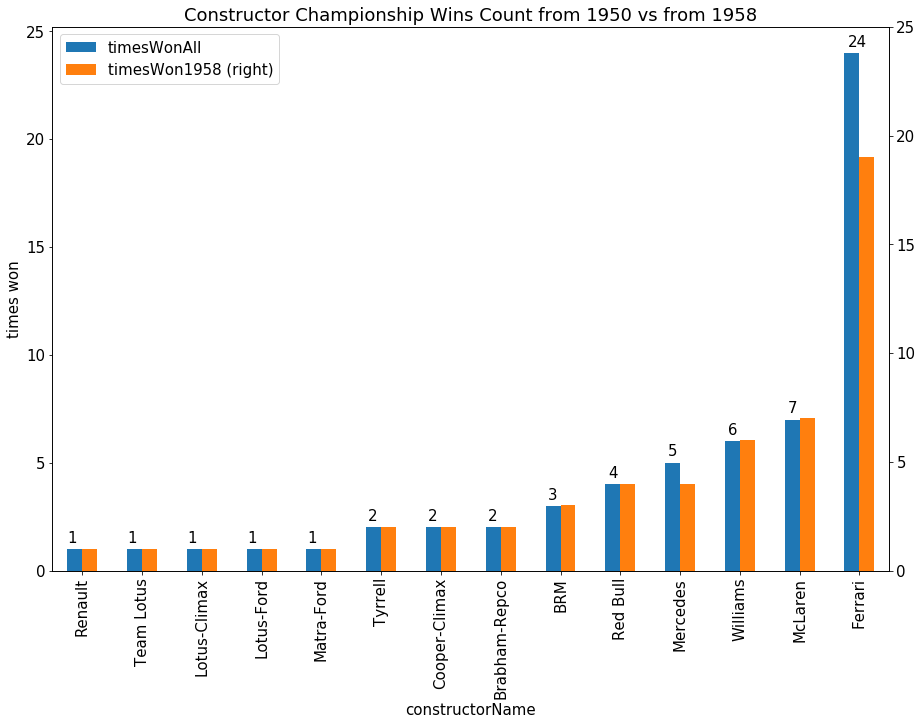

In [21]:
# plot the both 1958 and alltimes
# merge the 2 columns
constructor_win_merged = constructor_win_alltime.merge(constructor_win_1958plus, on='constructorId')
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['timesWonAll', 'timesWon1958'], secondary_y=['timesWon1958'], 
                                 kind='bar', title='Constructor Championship Wins Count from 1950 vs from 1958', figsize=(15,10))
ax.set_ylabel('times won')
ax.right_ax.set_ylim(0,25)

# add lables above bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height()  + 0.3))
    
fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Wins Count from 1950 vs from 1958.png", dpi=300, bbox_inches = "tight")

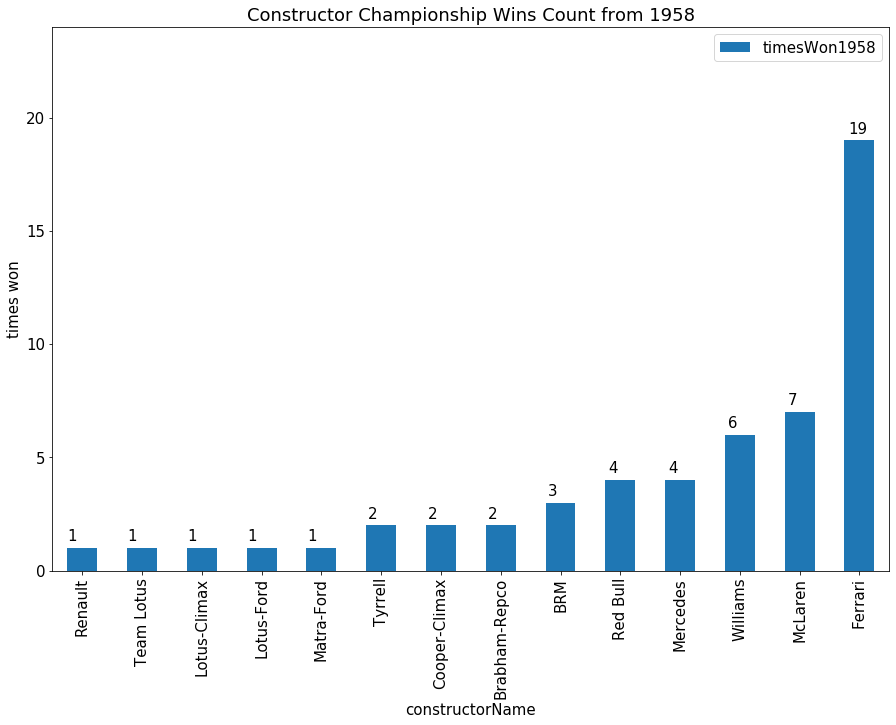

In [22]:
# plot 1958 and after
# merge the 2 columns
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['timesWon1958'], kind='bar', 
                                 title='Constructor Championship Wins Count from 1958', figsize=(15,10))
ax.set_ylabel('times won')
ax.set_ylim(0, 24)

# add lables above bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height()  + 0.3))
    
fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Wins Count from 1958.png", dpi=300, bbox_inches = "tight")

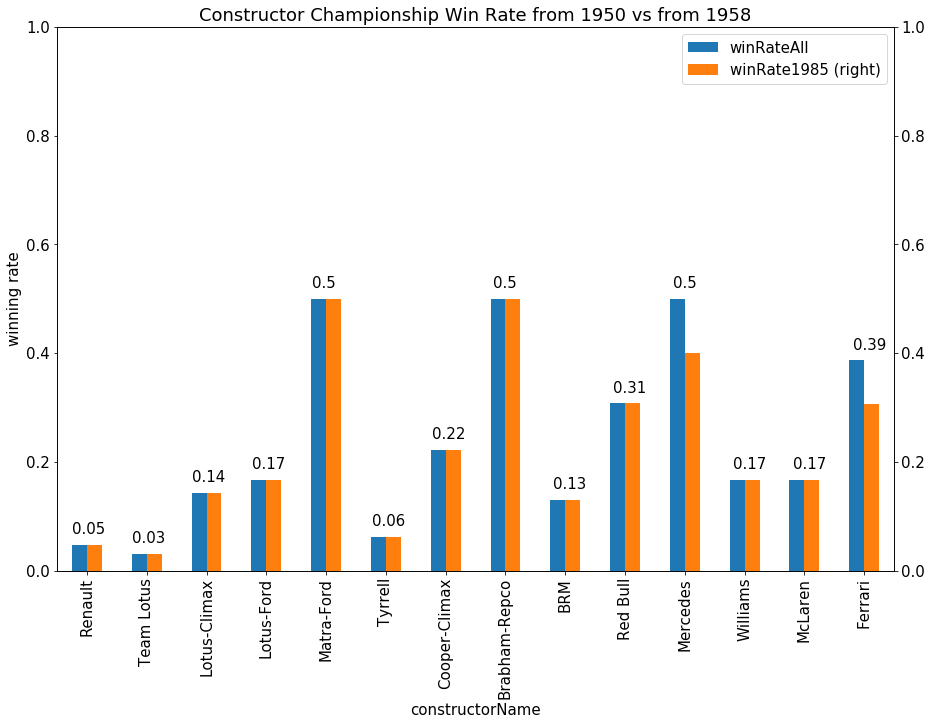

In [23]:
# plot the win rate as comparison
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['winRateAll', 'winRate1985'], secondary_y=['winRate1985'], 
                                 kind='bar', title='Constructor Championship Win Rate from 1950 vs from 1958', ylim=(0,1),
                                 figsize=(15,10))
ax.set_ylabel('winning rate')
ax.right_ax.set_ylim(0,1)

# add lables above bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() + 0.02))
    
fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Win Rate from 1950 vs from 1958.png", dpi=300, bbox_inches = "tight")

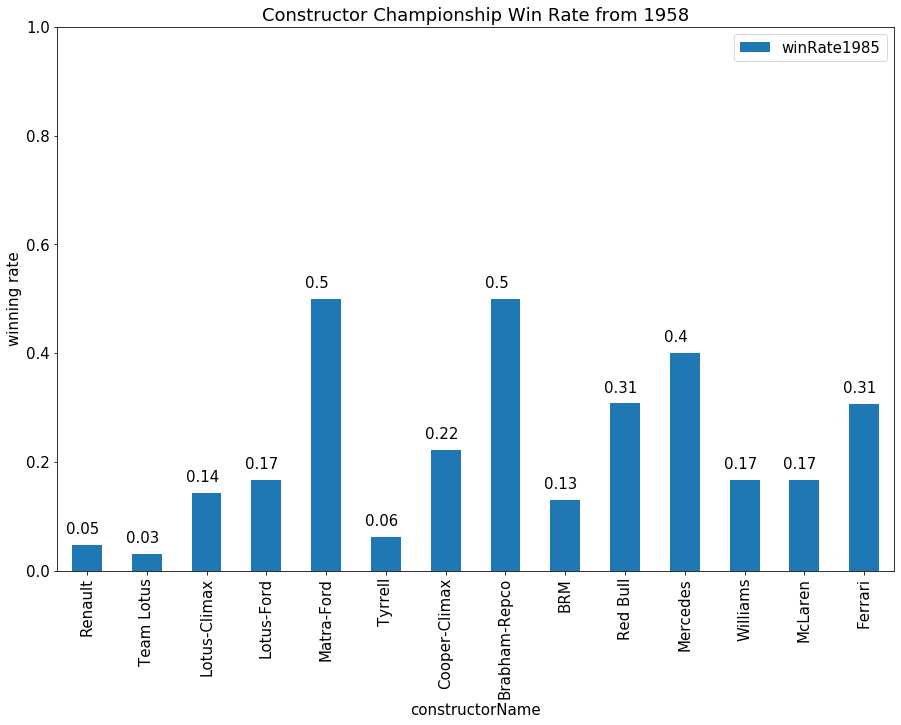

In [24]:
# plot the win rate for 1958 and above only
constructor_win_merged.rename(columns={'timesWon_x':'timesWonAll', 'timesWon_y':'timesWon1958', 'winRate_x': 'winRateAll',
                                       'winRate_y': 'winRate1985', 'name_x':'constructorName'}, inplace=True)
ax = constructor_win_merged.plot(x='constructorName', y=['winRate1985'], kind='bar', 
                                 title='Constructor Championship Win Rate from 1958', ylim=(0,1),
                                 figsize=(15,10))
ax.set_ylabel('winning rate')
ax.set_ylim(0,1)

# add lables above bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() - 0.1, p.get_height() + 0.02))
    
fig = ax.get_figure()
fig.savefig(graph_path+"Constructor Championship Win Rate from 1958.png", dpi=300, bbox_inches = "tight")

#### 2. Carry out an analysis and report on the drivers’ success based on race wins.

Driver's win the season is also based on the total points they accumulate over the season. <br>
The relevant tables for analysis are: results and drivers
Similar approach as task 1

In [25]:
# first merge results with driver 
results_drivers = pd.merge(results, drivers, on='driverId')
# use positionText to groupby 
results_drivers_groupby = results_drivers.groupby('driverId')['positionText'].apply(list).reset_index(name='positionText')
results_drivers_groupby

,driverId,positionText
0,1.0,"[1, R, 17, 15, 13, 7, 7, 7, 7, 7, 6, 2, 1, 1, ..."
1,2.0,"[2, R, R, 16, R, 8, 8, 8, 8, 8, 7, 6, 3, 2, 2,..."
2,3.0,"[3, D, R, 17, R, 9, 9, 9, 9, 9, 8, 7, 4, 3, 3,..."
3,4.0,"[4, 1, R, 18, R, 10, 10, 10, 10, 10, 9, 8, 5, ..."
4,5.0,"[R, 19, R, 11, 11, 11, 11, 11, 10, 9, 6, 5, 5,..."
...,...,...
803,839.0,"[13, 15, 15, R, R, R, 1, 2, 4, 2, 2, 1, R, 17,..."
804,840.0,"[3, 2, R, R, R, R, F, R, F, 15, F, R, F, R, F,..."
805,841.0,"[4, 3, 12, R]"
806,842.0,"[R, F, F, 11, F, 14, 13, 13, 12, 16]"


In [26]:
# use counter to count appearances of each position for each driverId, and store into list
results_drivers_lists = []
for index, row in results_drivers_groupby.iterrows():
    counts = Counter(row['positionText']) 
    counts['driverId'] = row['driverId']
    results_drivers_lists.append(counts)

In [27]:
# grab all the positions 
cols = pd.DataFrame(results_drivers_lists).columns.tolist()
# move # move driver to first, any other alphabets to the end
cols.insert(0, cols.pop(cols.index('driverId'))) 
non_digit_position = [col for col in cols if col.isdigit() == False and col != 'driverId']
for alpha in non_digit_position:   
    cols.insert(len(cols)+1, cols.pop(cols.index(alpha))) # insert at > len() results in last index"
    
digit_position = [col for col in cols if col.isdigit() == True]
for digit in digit_position:
    cols.insert(int(digit), cols.pop(cols.index(digit))) # sort position in order

In [28]:
# reorder the table based on the reordered cols
driver_wins = pd.DataFrame(results_drivers_lists).loc[:, cols]

In [29]:
# merge with driver to get more detail
driver_wins = driver_wins.merge(drivers, on='driverId')

Also include the total no.of races each driver has appeared, to get a success rate 

In [66]:
driver_season_appearance = results_drivers.groupby(['driverId','raceId'])['resultId','grid'].min().groupby('driverId')['resultId'].count(
    ).reset_index(name='appearances')
driver_season_appearance

C:\Users\Dango\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,driverId,appearances
0,1.0,207
1,2.0,177
2,3.0,203
3,4.0,289
4,5.0,110
...,...,...
803,839.0,29
804,840.0,20
805,841.0,2
806,842.0,5


In [67]:
# sanity check on driverId == 843, which has a calculated appearance of 4 times
results[results['driverId']==841]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
7776,7777.0,969.0,841.0,2.0,5.0,5.0,4.0,4,4.0,5.0,44.0,9.966,5040961.0,41.0,3.0,1:29.052,234.195,1.0
7795,7796.0,970.0,841.0,6.0,4.0,3.0,3.0,3,3.0,6.0,53.0,30.664,4612370.0,36.0,2.0,2:02.409,246.042,1.0
23385,23390.0,969.0,841.0,15.0,36.0,16.0,12.0,12,12.0,0.0,55.0,NaN,NaN,51.0,13.0,01:29.1,214.378,12.0
23412,23417.0,970.0,841.0,15.0,36.0,18.0,NaN,R,19.0,0.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0


Looks like found more potential errors with the data, driverId 843 has apparently participated twice in each of the raceIds, and worked for 2 different constructors each time. <br>
However, since we are group by ['driverId','raceId'], this data error does not cause any issues.

In [68]:
# merge with 2 tables, so we have both win times and appearances
driver_wins_final = driver_wins.merge(driver_season_appearance, on='driverId')
# add win rate
driver_wins_final['winRate'] = driver_wins_final['1']/driver_wins_final['appearances']
# combine name
driver_wins_final['driverName'] = driver_wins_final['forename'] + ' ' + driver_wins_final['surname']
# remove not required columns
del driver_wins_final['forename']
del driver_wins_final['surname']
del driver_wins_final['url']

In [69]:
driver_wins_final

,driverId,1,2,3,6,4,7,5,9,13,8,11,10,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,R,W,D,F,N,E,driverRef,number,code,dob,nationality,appearances,winRate,driverName
0,1.0,61.0,29.0,23.0,10.0,19.0,16.0,20.0,5.0,4.0,9.0,8.0,11.0,6.0,6.0,8.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,1.0,2.0,23.0,NaN,NaN,hamilton,44.0,HAM,07/01/1985,British,207,0.294686,Lewis Hamilton
1,2.0,5.0,10.0,13.0,11.0,2.0,5.0,8.0,4.0,5.0,21.0,4.0,17.0,8.0,1.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,1.0,1.0,1.0,NaN,NaN,heidfeld,NaN,HEI,10/05/1977,German,177,0.028249,Nick Heidfeld
2,3.0,29.0,31.0,17.0,14.0,17.0,18.0,14.0,18.0,10.0,8.0,15.0,8.0,9.0,5.0,4.0,3.0,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,1.0,1.0,19.0,NaN,NaN,rosberg,6.0,ROS,27/06/1985,German,203,0.142857,Nico Rosberg
3,4.0,25.0,25.0,25.0,20.0,31.0,14.0,23.0,12.0,12.0,14.0,21.0,17.0,15.0,10.0,4.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,2.0,1.0,23.0,2.0,NaN,alonso,14.0,ALO,29/07/1981,Spanish,289,0.086505,Fernando Alonso
4,5.0,5.0,5.0,3.0,4.0,3.0,1.0,7.0,5.0,11.0,2.0,12.0,1.0,3.0,12.0,8.0,9.0,8.0,8.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,NaN,4.0,1.0,NaN,kovalainen,NaN,KOV,19/10/1981,Finnish,110,0.045455,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,839.0,2.0,3.0,NaN,5.0,1.0,1.0,2.0,2.0,2.0,3.0,NaN,5.0,2.0,1.0,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,7.0,NaN,NaN,ocon,31.0,OCO,17/09/1996,French,29,0.068966,Esteban Ocon
804,840.0,NaN,1.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,3.0,2.0,NaN,1.0,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,7.0,NaN,NaN,stroll,18.0,STR,29/10/1998,Canadian,20,NaN,Lance Stroll
805,841.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,giovinazzi,36.0,GIO,14/12/1993,Italian,2,NaN,Antonio Giovinazzi
806,842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,gasly,10.0,GAS,07/02/1996,French,5,NaN,Pierre Gasly


In [70]:
# write to file
driver_wins_final.to_csv(output_path + 'driver_wins.csv', index=False)
# slimmed down version with just 1st place result
driver_wins_final[['driverId', '1', 'driverRef', 'dob', 'nationality', 'appearances', 'winRate', 'driverName']].to_csv(
    output_path + 'driver_wins_slimed.csv', index=False)

In [71]:
driver_wins_final.head(10)

,driverId,1,2,3,6,4,7,5,9,13,8,11,10,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,R,W,D,F,N,E,driverRef,number,code,dob,nationality,appearances,winRate,driverName
0,1.0,61.0,29.0,23.0,10.0,19.0,16.0,20.0,5.0,4.0,9.0,8.0,11.0,6.0,6.0,8.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,1.0,2.0,23.0,NaN,NaN,hamilton,44.0,HAM,07/01/1985,British,207,0.294686,Lewis Hamilton
1,2.0,5.0,10.0,13.0,11.0,2.0,5.0,8.0,4.0,5.0,21.0,4.0,17.0,8.0,1.0,5.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,1.0,1.0,1.0,NaN,NaN,heidfeld,NaN,HEI,10/05/1977,German,177,0.028249,Nick Heidfeld
2,3.0,29.0,31.0,17.0,14.0,17.0,18.0,14.0,18.0,10.0,8.0,15.0,8.0,9.0,5.0,4.0,3.0,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,1.0,1.0,19.0,NaN,NaN,rosberg,6.0,ROS,27/06/1985,German,203,0.142857,Nico Rosberg
3,4.0,25.0,25.0,25.0,20.0,31.0,14.0,23.0,12.0,12.0,14.0,21.0,17.0,15.0,10.0,4.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,2.0,1.0,23.0,2.0,NaN,alonso,14.0,ALO,29/07/1981,Spanish,289,0.086505,Fernando Alonso
4,5.0,5.0,5.0,3.0,4.0,3.0,1.0,7.0,5.0,11.0,2.0,12.0,1.0,3.0,12.0,8.0,9.0,8.0,8.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,1.0,NaN,4.0,1.0,NaN,kovalainen,NaN,KOV,19/10/1981,Finnish,110,0.045455,Heikki Kovalainen
5,6.0,1.0,3.0,NaN,3.0,2.0,1.0,1.0,NaN,1.0,NaN,1.0,3.0,7.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,nakajima,NaN,NAK,11/01/1985,Japanese,36,0.027778,Kazuki Nakajima
6,7.0,2.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,6.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,bourdais,NaN,BOU,28/02/1979,French,25,0.080000,SÌ©bastien Bourdais
7,8.0,11.0,25.0,24.0,19.0,24.0,24.0,30.0,15.0,7.0,11.0,8.0,12.0,17.0,11.0,5.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,2.0,NaN,17.0,NaN,NaN,raikkonen,7.0,RAI,17/10/1979,Finnish,266,0.041353,Kimi RÌ_ikkÌ¦nen
8,9.0,2.0,4.0,5.0,4.0,8.0,6.0,7.0,3.0,2.0,5.0,1.0,1.0,3.0,4.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,1.0,2.0,1.0,NaN,NaN,kubica,NaN,KUB,07/12/1984,Polish,76,0.026316,Robert Kubica
9,10.0,4.0,3.0,4.0,3.0,3.0,1.0,3.0,2.0,3.0,6.0,NaN,4.0,2.0,6.0,6.0,10.0,6.0,10.0,7.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,5.0,NaN,3.0,2.0,NaN,glock,NaN,GLO,18/03/1982,German,94,0.042553,Timo Glock


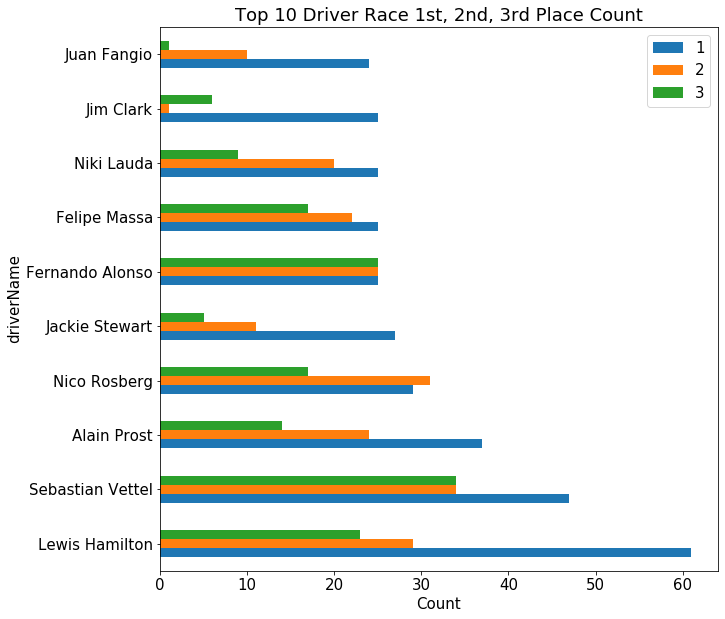

In [72]:
ax = driver_wins_final.sort_values(['1','2','3'], ascending=False).head(10).plot.barh(x='driverName', y= ['1', '2', '3'],
                                    title='Top 10 Driver Race 1st, 2nd, 3rd Place Count', figsize=(10,10))
ax.set_xlabel('Count')    
fig = ax.get_figure()
fig.savefig(graph_path+"Top 10 Driver Race Place Count.png", dpi=300, bbox_inches = "tight")

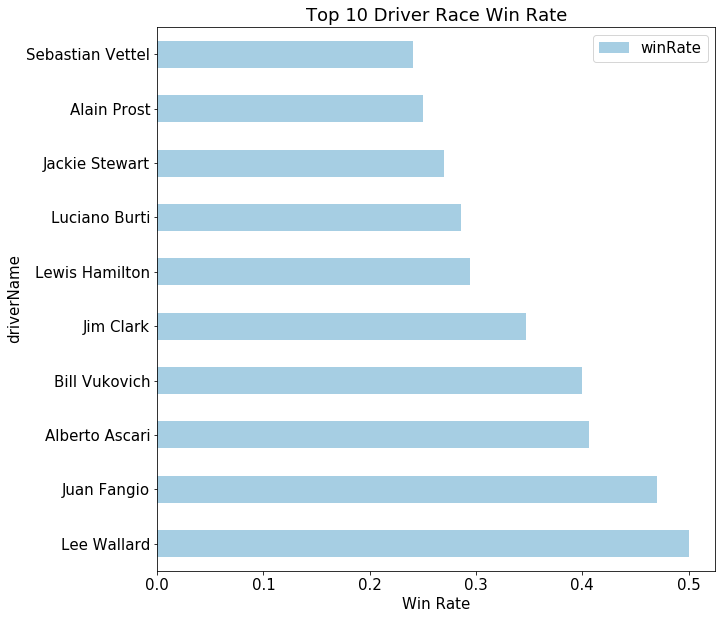

In [73]:
ax = driver_wins_final.sort_values('winRate', ascending=False).head(10).plot.barh(x='driverName', y= ['winRate'],
                                    title='Top 10 Driver Race Win Rate', colormap='Paired', figsize=(10,10))

ax.set_xlabel('Win Rate')    
fig = ax.get_figure()
fig.savefig(graph_path+"Top 10 Driver Race Win Rate.png", dpi=300, bbox_inches = "tight")

In [38]:
driver_wins_final[driver_wins_final['driverName'] == 'Lee Wallard']

,driverId,1,2,3,6,4,7,5,9,13,8,11,10,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,R,W,D,F,N,E,driverRef,number,code,dob,nationality,appearances,winRate,driverName
731,766.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wallard,NaN,NaN,07/09/1910,American,2,0.5,Lee Wallard


In [39]:
driver_wins_final[driver_wins_final['driverName'] == 'Lewis Hamilton']

,driverId,1,2,3,6,4,7,5,9,13,8,11,10,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,R,W,D,F,N,E,driverRef,number,code,dob,nationality,appearances,winRate,driverName
0,1.0,61.0,29.0,23.0,10.0,19.0,16.0,20.0,5.0,4.0,9.0,8.0,11.0,6.0,6.0,8.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,1.0,2.0,23.0,NaN,NaN,hamilton,44.0,HAM,07/01/1985,British,207,0.294686,Lewis Hamilton


#### 3.Carry out an analysis and report on the risks associated with race tracks based on accidents and collisions.

In [40]:
# check the different status
status_list = status['status'].unique().tolist()

From status, there are clearly stated accidents/collision, as well as other status potentially caused by accidents/collision
<ul> accide/collision:
<li>Fatal accident, Accident, Collision, Collision damage</li>
</ul>
<ul> potentially due to accident/collision:
<li>Injured, Injury, Eye injury, Broken wing, Front wing, Heat shield fire, Oil leak, Fuel leak, Engine fire, Spun off, Puncture, Chassis, Safety, Safety concerns, Spun off</li>
</ul>

In [41]:
# let's generate 2 seperate lists 
risk_tier1_list = [stats for stats in status_list if 'accident' in stats.lower() or 'collision' in stats.lower()]
risk_tier2_list = [stats for stats in status_list if 'injur' in stats.lower() or 'wing' in stats.lower() 
                   or 'leak' in stats.lower() or 'firs' in stats.lower() or 'safe' in stats.lower() or 'punc' in stats.lower()]
risk_tier2_list += risk_tier1_list

In [42]:
# aggregation on circuitId and status
results_status = pd.merge(results, status, on='statusId').merge(races, on='raceId')
results_status_tier1 = results_status[['circuitId', 'status']][results_status['status'].isin(risk_tier1_list)]
results_status_tier2 = results_status[['circuitId', 'status']][results_status['status'].isin(risk_tier2_list)]
# compare size
results_status_tier1.shape, results_status_tier2.shape, 

((1789, 2), (2071, 2))

In [43]:
# function to count the no.of accidents/collision for each circuit
def count_danger_tracks(df):
    df = df.groupby(['circuitId']).agg('count').reset_index(['circuitId']) \
        .sort_values('status', ascending=False)
    # merge with circuit table to get detailed information 
    df = df.merge(circuits, on='circuitId')
    # rename status column
    df['incidentCount'] = df['status']
    # drop not required columns
    del df['lat']
    del df['lng']
    del df['alt']                       
    del df['url']
    del df['status']
    
    return df

In [44]:
results_status_tier1_agg = count_danger_tracks(results_status_tier1)
results_status_tier2_agg = count_danger_tracks(results_status_tier2)

In [45]:
results_status_tier2_agg

,circuitId,circuitRef,name,location,country,incidentCount
0,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,176
1,20,nurburgring,NÌ_rburgring,NÌ_rburg,Germany,113
2,14,monza,Autodromo Nazionale di Monza,Monza,Italy,113
3,9,silverstone,Silverstone Circuit,Silverstone,UK,99
4,13,spa,Circuit de Spa-Francorchamps,Spa,Belgium,94
5,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,90
6,19,indianapolis,Indianapolis Motor Speedway,Indianapolis,USA,85
7,18,interlagos,AutÌ_dromo JosÌ© Carlos Pace,SÌ£o Paulo,Brazil,75
8,39,zandvoort,Circuit Park Zandvoort,Zandvoort,Netherlands,60
9,23,osterreichring,A1-Ring,Spielburg,Austria,58


In [46]:
# write to csv
results_status_tier1_agg.to_csv(output_path + 'dangerous_tracks_tier1.csv', index=False)
results_status_tier2_agg.to_csv(output_path + 'dangerous_tracks_tier2.csv', index=False)

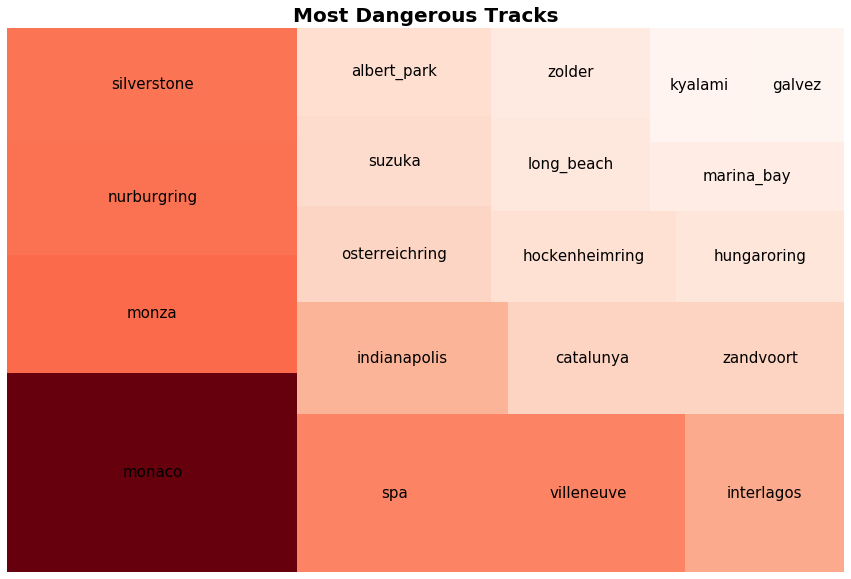

In [47]:
# plot
# reduce row size
results_status_tier1_agg_top = results_status_tier1_agg.head(20)
# normalize the values
norm = matplotlib.colors.Normalize(vmin=min(results_status_tier1_agg_top['incidentCount']), 
                                   vmax=max(results_status_tier1_agg_top['incidentCount']))
colors = [cm.Reds(norm(value)) for value in results_status_tier1_agg_top['incidentCount']]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 10)

#Use squarify to plot label it and add colours.
squarify.plot(label=results_status_tier1_agg_top['circuitRef'], sizes=results_status_tier1_agg_top['incidentCount'], color = colors)
plt.title("Most Dangerous Tracks",fontsize=20,fontweight="bold")

plt.axis('off')
plt.show()

# save
fig.savefig(graph_path+"Top 20 Dangerous Track by Accidents and Collision Tier1.png", dpi=300, bbox_inches = "tight")

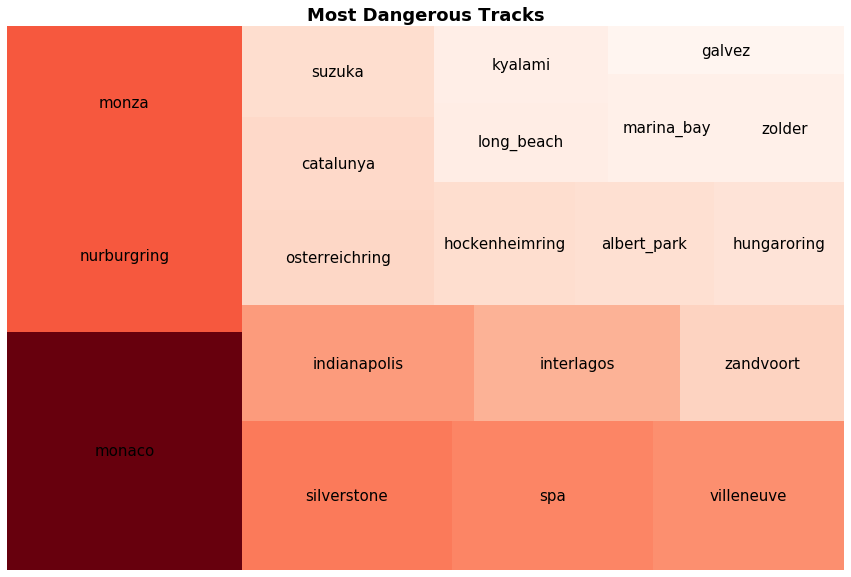

In [48]:
# plot the other data, check if any changes in the top 30
# reduce row size
results_status_tier2_agg_top = results_status_tier2_agg.head(20)
# normalize the values
norm = matplotlib.colors.Normalize(vmin=min(results_status_tier2_agg_top['incidentCount']), 
                                   vmax=max(results_status_tier2_agg_top['incidentCount']))
colors = [cm.Reds(norm(value)) for value in results_status_tier2_agg_top['incidentCount']]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15, 10)

#Use squarify to plot label it and add colours.
squarify.plot(label=results_status_tier2_agg_top['circuitRef'], sizes=results_status_tier2_agg_top['incidentCount'], color = colors)
plt.title("Most Dangerous Tracks",fontsize=18,fontweight="bold")

plt.axis('off')
plt.show()

# save
fig.savefig(graph_path+"Top 20 Dangerous Track by Accidents and Collision Tier2.png", dpi=300, bbox_inches = "tight")

#### 4. Carry out an analysis and report on the fastest race tracks based on lap times.

For this task, requires mainly results, since during the clean up already filled missing fastestLapTime with data in lapTimes, as much as we could. 

In [49]:
# merge with races table, so result can then be mreged with circuit table to get the detailed track information
results_races = results.merge(races, on='raceId')
results_races_circuits = results_races.merge(circuits, on='circuitId')

In [50]:
# filter column
filter_columns = ['circuitId', 'raceId', 'fastestLapTime', 'name_y']
results_races_circuits = results_races_circuits[filter_columns]
# drop na in fastestLapTime
results_races_circuits.dropna(inplace=True)
results_races_circuits.columns = ['circuitId', 'raceId', 'fastestLapTime', 'circuitName']

In [51]:
results_races_circuits[results_races_circuits['circuitId']==8].sort_values('fastestLapTime')

,circuitId,raceId,fastestLapTime,circuitName
13599,8,134.0,1:15.045,Circuit de Nevers Magny-Cours
13604,8,134.0,1:15.311,Circuit de Nevers Magny-Cours
13566,8,99.0,1:15.377,Circuit de Nevers Magny-Cours
13596,8,134.0,1:15.406,Circuit de Nevers Magny-Cours
13586,8,117.0,1:15.512,Circuit de Nevers Magny-Cours
...,...,...,...,...
13742,8,232.0,1:24.818,Circuit de Nevers Magny-Cours
13673,8,181.0,1:25.608,Circuit de Nevers Magny-Cours
13550,8,80.0,1:29.654,Circuit de Nevers Magny-Cours
13507,8,43.0,1:44.767,Circuit de Nevers Magny-Cours


In [52]:
# need to convert fastestLapTime into seconds to properly find the min time
# function to take "01:09.1" and output seconds
def to_seconds(time_string):
    try:
        date_time = datetime.datetime.strptime(time_string, "%M:%S.%f")
    except ValueError:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S.%f")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

In [53]:
(datetime.datetime.strptime('16:16.243', "%M:%S.%f") - datetime.datetime(1900, 1, 1)).total_seconds()

976.243

In [54]:
results_races_circuits['fastestLapTimeSeconds'] = results_races_circuits['fastestLapTime'].apply(to_seconds)

In [55]:
# fastest lapTimes - groupby raceId
fastest_circuits = results_races_circuits.groupby('circuitId')['circuitName','fastestLapTimeSeconds'].agg('min').reset_index()
fastest_circuits

C:\Users\Dango\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,circuitId,circuitName,fastestLapTimeSeconds
0,1,Albert Park Grand Prix Circuit,84.125
1,2,Sepang International Circuit,94.080
2,3,Bahrain International Circuit,90.252
3,4,Circuit de Barcelona-Catalunya,75.641
4,5,Istanbul Park,84.770
5,6,Circuit de Monaco,74.439
6,7,Circuit Gilles Villeneuve,73.622
7,8,Circuit de Nevers Magny-Cours,75.045
8,9,Silverstone Circuit,78.739
9,10,Hockenheimring,73.780


In [56]:
# write to csv
fastest_circuits.to_csv(output_path + 'fastest_tracks.csv', index=False)

In [57]:
fastest_circuits

,circuitId,circuitName,fastestLapTimeSeconds
0,1,Albert Park Grand Prix Circuit,84.125
1,2,Sepang International Circuit,94.080
2,3,Bahrain International Circuit,90.252
3,4,Circuit de Barcelona-Catalunya,75.641
4,5,Istanbul Park,84.770
5,6,Circuit de Monaco,74.439
6,7,Circuit Gilles Villeneuve,73.622
7,8,Circuit de Nevers Magny-Cours,75.045
8,9,Silverstone Circuit,78.739
9,10,Hockenheimring,73.780


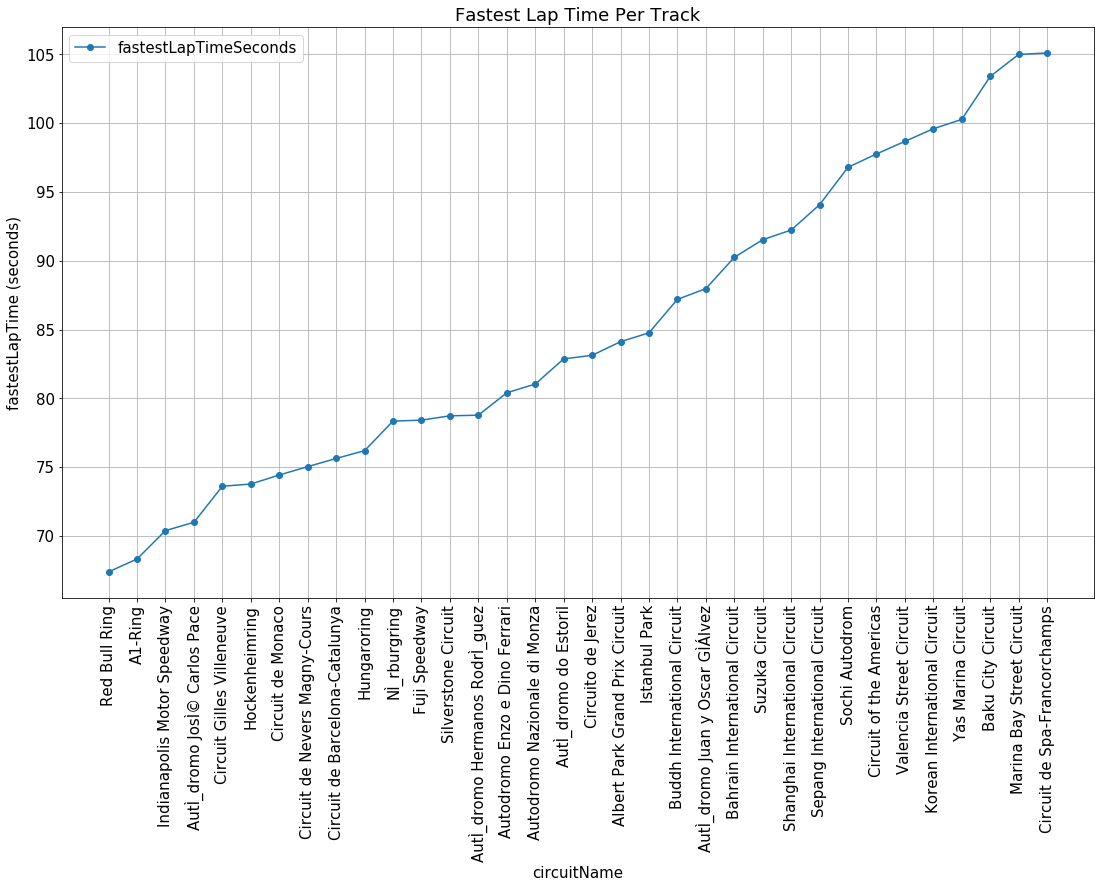

In [58]:
# sort by time
fastest_circuits = fastest_circuits.sort_values('fastestLapTimeSeconds')
# plot
fig, ax = plt.subplots()
ax.plot(fastest_circuits['circuitName'], fastest_circuits['fastestLapTimeSeconds'], 'o-')

ax.set(xlabel='circuitName', ylabel='fastestLapTime (seconds)',
       title='Fastest Lap Time Per Track')
ax.legend(['fastestLapTimeSeconds'])
ax.grid()

fig.set_size_inches(18.5, 10.5)
plt.xticks(rotation=90)
plt.show()

fig.savefig(graph_path+"Fastest Lap Time Per Track.png", dpi=300, bbox_inches = "tight")

#### 5.Recommend engineered features to the Data Scientists for the ML model they are building.

In [59]:
# to win either constructor or driver champion, points is the most important thing
# let's check correlation of points with other attributes
corr = results.corr()
corr.style.background_gradient(cmap='coolwarm')

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,statusId
resultId,1.000000,0.697219,0.468243,0.475907,0.211245,-0.000071,0.091598,-0.028011,0.175539,0.082383,0.312763,0.269450,0.012649,0.036760
raceId,0.697219,1.000000,0.618638,0.327582,0.215549,-0.009704,0.065449,0.061461,0.094530,0.015263,0.245213,0.222743,-0.015812,0.091815
driverId,0.468243,0.618638,1.000000,0.248030,0.254334,0.061253,0.167014,0.074527,-0.097159,0.046384,0.294030,0.092797,0.160892,0.082242
constructorId,0.475907,0.327582,0.248030,1.000000,0.208789,0.120045,0.185173,0.101179,-0.074732,0.010727,0.330859,0.063550,0.255656,0.132550
number,0.211245,0.215549,0.254334,0.208789,1.000000,0.189036,0.254152,0.241502,-0.148713,-0.036386,0.212313,0.027622,0.198565,0.185504
grid,-0.000071,-0.009704,0.061253,0.120045,0.189036,1.000000,0.651252,0.131809,-0.356515,0.084996,0.109112,-0.009618,0.608204,-0.138471
position,0.091598,0.065449,0.167014,0.185173,0.254152,0.651252,1.000000,1.000000,-0.645920,-0.056088,-0.028064,0.047228,0.741391,0.371253
positionOrder,-0.028011,0.061461,0.074527,0.101179,0.241502,0.131809,1.000000,1.000000,-0.564803,-0.658549,-0.029136,-0.296632,0.648907,0.528210
points,0.175539,0.094530,-0.097159,-0.074732,-0.148713,-0.356515,-0.645920,-0.564803,1.000000,0.258257,-0.058453,0.200755,-0.540120,-0.268009
laps,0.082383,0.015263,0.046384,0.010727,-0.036386,0.084996,-0.056088,-0.658549,0.258257,1.000000,0.599665,0.673261,-0.217628,-0.353389


A higher correlation could indicate a significant feature:
- points has a -0.36 with grid, which is the starting position of the car/driver
- points has a -0.65 and -0.56 with position and positionOrder, but this is not useful as points are given based on finishing position


Let's also check if a driver can affect it, such as age

In [60]:
# driver features
results_races = pd.merge(results, races, on='raceId')
results_races = results_races.dropna(how = 'all')
results_races_agg = results_races.groupby(['year', 'driverId', 'resultId'])['points'].apply(sum).reset_index(name='points')
# get all drivers who won each year
results_races_winner = results_races_agg.groupby(['year']).max().reset_index()
results_driver_winner = results_races_winner.merge(drivers, on='driverId')

In [61]:
# convert dob to proepr datetime object to calculate age
results_driver_winner['dob'] = pd.to_datetime(results_driver_winner['dob'])
results_driver_winner['raceYear']  = pd.to_datetime(results_driver_winner['year'], format='%Y')
results_driver_winner['age'] = (results_driver_winner['raceYear']  - results_driver_winner['dob']).astype('timedelta64[Y]') 

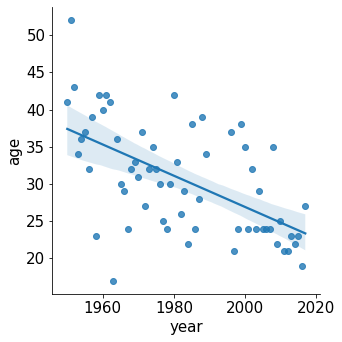

In [62]:
# fig, ax = plt.subplots()
# results_driver_winner.plot(x='year', y = 'age', kind='scatter', ax=ax)
sns.lmplot(x='year',y='age',data=results_driver_winner, fit_reg=True) 

We can see the age of winning drivers are getting younger. 

In [63]:
# let's check correlation with points
results_driver_winner.merge(results, on='driverId').corr().style.background_gradient(cmap='coolwarm')

,year,driverId,resultId_x,points_x,number_x,age,resultId_y,raceId,constructorId,number_y,grid,position,positionOrder,points_y,laps,milliseconds,fastestLap,rank,statusId
year,1.000000,0.290808,0.165386,0.536374,0.770362,-0.621512,-0.098946,0.166950,-0.027729,-0.043328,-0.009767,0.160941,-0.046956,0.137581,0.096807,-0.200396,0.085085,0.126033,-0.180717
driverId,0.290808,1.000000,0.923738,0.856714,0.126391,-0.623053,0.480510,0.803487,0.342542,0.228444,0.022621,0.195004,0.090319,0.135138,0.027292,0.136815,0.111422,0.091673,0.064016
resultId_x,0.165386,0.923738,1.000000,0.730133,0.037710,-0.646491,0.579640,0.884571,0.341376,0.249304,0.035483,0.166861,0.113856,0.121892,-0.005323,0.146664,0.102637,0.061559,0.097414
points_x,0.536374,0.856714,0.730133,1.000000,0.303050,-0.640766,0.315303,0.642537,0.305556,0.185203,0.018724,0.230477,0.073503,0.113300,0.035157,0.022378,0.105868,0.112404,0.006366
number_x,0.770362,0.126391,0.037710,0.303050,1.000000,0.110242,0.042877,0.141541,0.327298,0.442702,0.059298,0.278086,0.172490,-0.190446,-0.077402,0.025576,-0.037971,0.282079,0.119307
age,-0.621512,-0.623053,-0.646491,-0.640766,0.110242,1.000000,-0.252786,-0.560620,-0.185802,-0.190319,-0.060450,-0.208798,-0.104514,-0.128852,-0.001209,0.079974,-0.032584,-0.085057,-0.022421
resultId_y,-0.098946,0.480510,0.579640,0.315303,0.042877,-0.252786,1.000000,0.632466,0.496866,0.157211,0.140381,0.313832,0.041218,0.172763,0.089103,0.253598,0.211973,0.101868,-0.013732
raceId,0.166950,0.803487,0.884571,0.642537,0.141541,-0.560620,0.632466,1.000000,0.324077,0.207519,0.029475,0.176456,0.128361,0.108456,-0.016759,0.202387,0.140760,0.012309,0.097829
constructorId,-0.027729,0.342542,0.341376,0.305556,0.327298,-0.185802,0.496866,0.324077,1.000000,0.343305,0.354235,0.586674,0.254598,-0.211064,-0.002026,0.179029,-0.007886,0.544585,0.098236
number_y,-0.043328,0.228444,0.249304,0.185203,0.442702,-0.190319,0.157211,0.207519,0.343305,1.000000,0.277458,0.462872,0.354187,-0.309201,-0.143577,0.105357,0.041081,0.483960,0.231785


Age has a good correlaiton only with the aggregated points (point_x), which only consists of winning driver's points. However, correlation with overall points (point_y）shows very small correlations.

In [64]:
# pitStop has not been used much until now, let's check for any potential attribute which may assist with the model
pitStops.head(5)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [65]:
# check correlation matrix
results.merge(pitStops, on='raceId').corr().style.background_gradient(cmap='coolwarm')

,resultId,raceId,driverId_x,constructorId,number,grid,position,positionOrder,points,laps,milliseconds_x,fastestLap,rank,statusId,driverId_y,stop,lap,milliseconds_y
resultId,1.000000,0.113723,0.033853,0.315431,0.085820,0.006750,0.186718,-0.234822,0.327796,0.286801,0.189628,0.121024,0.013287,-0.223336,0.033864,-0.002735,-0.016671,0.016433
raceId,0.113723,1.000000,0.291572,-0.058362,0.202473,-0.116256,-0.065371,0.008139,0.030678,-0.062393,-0.081372,-0.119691,-0.103222,0.104778,0.293367,-0.019335,-0.131502,0.148789
driverId_x,0.033853,0.291572,1.000000,-0.049711,0.195111,0.106706,0.236128,0.112592,-0.225385,-0.016177,-0.002610,-0.054342,0.206388,0.060649,0.099984,-0.009527,-0.040907,0.036583
constructorId,0.315431,-0.058362,-0.049711,1.000000,0.146807,0.225284,0.346619,0.117015,-0.010688,0.034348,0.039535,-0.008951,0.289021,0.011079,-0.009449,-0.005069,0.007430,-0.013197
number,0.085820,0.202473,0.195111,0.146807,1.000000,0.121884,0.204604,0.174339,-0.124499,-0.073350,0.038096,-0.032091,0.154020,0.130731,0.057081,-0.001334,-0.022251,0.020911
grid,0.006750,-0.116256,0.106706,0.225284,0.121884,1.000000,0.691845,0.127495,-0.422079,0.123085,0.100759,-0.061448,0.564104,-0.216079,-0.037928,0.000112,0.018298,-0.011472
position,0.186718,-0.065371,0.236128,0.346619,0.204604,0.691845,1.000000,1.000000,-0.718468,-0.146173,0.080055,-0.051027,0.703274,0.472860,-0.020163,-0.002864,0.002829,-0.003903
positionOrder,-0.234822,0.008139,0.112592,0.117015,0.174339,0.127495,1.000000,1.000000,-0.630034,-0.769542,0.079284,-0.362958,0.600325,0.618032,0.006403,0.000007,-0.013094,-0.002767
points,0.327796,0.030678,-0.225385,-0.010688,-0.124499,-0.422079,-0.718468,-0.630034,1.000000,0.303805,0.019971,0.208632,-0.542178,-0.276736,0.008331,-0.000285,-0.002421,0.003840
laps,0.286801,-0.062393,-0.016177,0.034348,-0.073350,0.123085,-0.146173,-0.769542,0.303805,1.000000,0.372843,0.790369,-0.126869,-0.541182,-0.023553,0.005876,0.062062,-0.015960


correlation are all very small (close to 0)

#### Suggested features to use
- Correlation matrix indicates grid may be a good candidate
- From the constructor winning analysis, Ferrari had signficantly more championships than any other with a decent win rates of 0.39, so constructor could be a good candidate